In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt


def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


In [2]:
# --------------------------------
# Device configuration
# --------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [3]:
#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None #norm_layer = 'BN'
print(hidden_size)

[128, 512, 512, 512, 512]


In [4]:
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Choose the right data augmentation transforms with the right       #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=test_transform
                                          )

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting datasets/cifar-10-python.tar.gz to datasets/


In [5]:


#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## Question 1.A.

### In the cell below, we are going to implement the architecture of our model as indicated in the instructions. 

In [ ]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.cnn_layers = nn.Sequential(
            # Defining the first 2d convolitional layer
            nn.Conv2d(3,128 , kernel_size = 3, stride = 1, padding =1), # taking a padding and stride of size 1 and 1 will give us the same shape
            nn.MaxPool2d(2, stride = 2),                                # this is what we need since  maxpooling will cut the matrix in half
            nn.ReLU(),
            # Defining the second 2d convolitional layer                             
            nn.Conv2d(128, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the third 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the fourth 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the fifth 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(),

        )


        self.linear_layers = nn.Sequential(
            nn.Linear(512, 10)
        )


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # conv layers
        x = self.cnn_layers(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fully connected layer
        out = self.linear_layers(x)
      


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


###  Taking a filter with stride and padding corresponding to '1' will result in a matrix with the same size. This is what we need because max-poolinf filter with the given parameters will cut the matrix in half. 

In [ ]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)

In [ ]:
model.apply(weights_init)
# Print the model
print(model)
# Print model size

ConvNet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=512, out_fea

### Below is a visualization of filters **before** the training




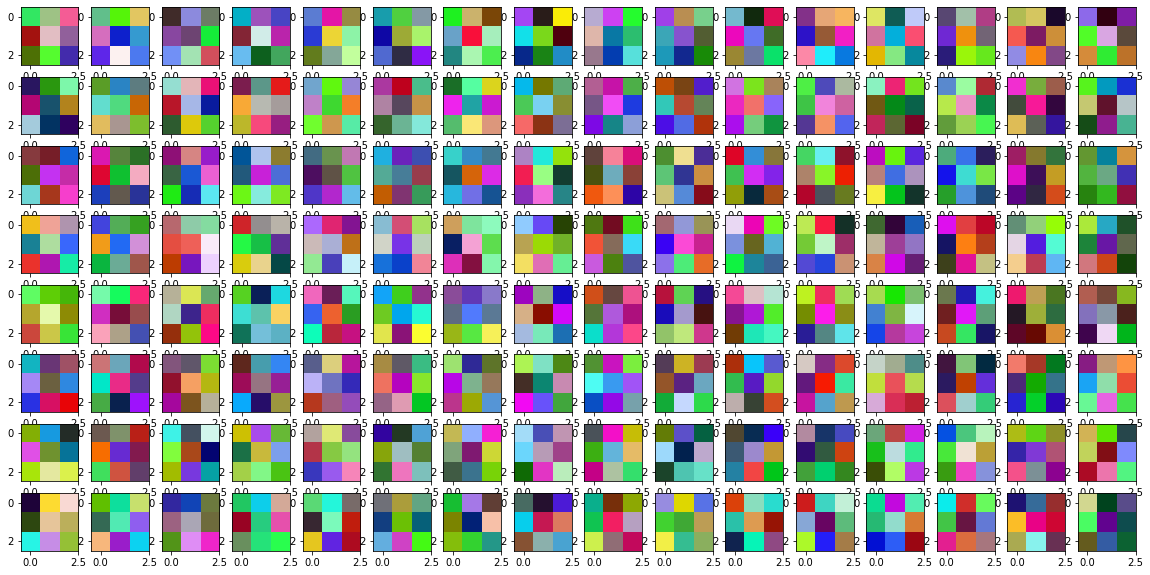

In [ ]:

#======================================================================================
# Q1.a: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
#======================================================================================
VisualizeFilter(model)

In [ ]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
best_model = type(model)(input_size, hidden_size, num_classes, norm_layer=norm_layer) # get a new instance
#best_model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer)
for epoch in tqdm(range(num_epochs)):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    loss_train.append(loss_iter/(len(train_loader)*batch_size))

    
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
        
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
        
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        print('Validation accuracy is: {} %'.format(accuracy))
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # the model with the best validation accuracy so-far (use best_model).          #
        #################################################################################

        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    



  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Step [100/245], Loss: 1.6137
Epoch [1/20], Step [200/245], Loss: 1.4338


  5%|▌         | 1/20 [01:06<21:01, 66.37s/it]

Validation accuracy is: 55.7 %
Epoch [2/20], Step [100/245], Loss: 1.4030
Epoch [2/20], Step [200/245], Loss: 1.0574


 10%|█         | 2/20 [02:12<19:55, 66.40s/it]

Validation accuracy is: 64.2 %
Epoch [3/20], Step [100/245], Loss: 0.8959
Epoch [3/20], Step [200/245], Loss: 0.8669


 15%|█▌        | 3/20 [03:19<18:48, 66.39s/it]

Validation accuracy is: 66.6 %
Epoch [4/20], Step [100/245], Loss: 0.8517
Epoch [4/20], Step [200/245], Loss: 0.7100


 20%|██        | 4/20 [04:25<17:42, 66.38s/it]

Validation accuracy is: 71.4 %
Epoch [5/20], Step [100/245], Loss: 0.8005
Epoch [5/20], Step [200/245], Loss: 0.7099


 25%|██▌       | 5/20 [05:32<16:36, 66.42s/it]

Validation accuracy is: 74.6 %
Epoch [6/20], Step [100/245], Loss: 0.7983
Epoch [6/20], Step [200/245], Loss: 0.6076


 30%|███       | 6/20 [06:38<15:30, 66.46s/it]

Validation accuracy is: 77.3 %
Epoch [7/20], Step [100/245], Loss: 0.6151
Epoch [7/20], Step [200/245], Loss: 0.5127


 35%|███▌      | 7/20 [07:45<14:23, 66.46s/it]

Validation accuracy is: 78.3 %
Epoch [8/20], Step [100/245], Loss: 0.5424
Epoch [8/20], Step [200/245], Loss: 0.4485


 40%|████      | 8/20 [08:51<13:17, 66.48s/it]

Validation accuracy is: 80.0 %
Epoch [9/20], Step [100/245], Loss: 0.5155
Epoch [9/20], Step [200/245], Loss: 0.7650


 45%|████▌     | 9/20 [09:57<12:10, 66.45s/it]

Validation accuracy is: 80.3 %
Epoch [10/20], Step [100/245], Loss: 0.4144
Epoch [10/20], Step [200/245], Loss: 0.5995


 50%|█████     | 10/20 [11:04<11:04, 66.42s/it]

Validation accuracy is: 80.1 %
Epoch [11/20], Step [100/245], Loss: 0.4476
Epoch [11/20], Step [200/245], Loss: 0.3106


 55%|█████▌    | 11/20 [12:10<09:57, 66.39s/it]

Validation accuracy is: 81.1 %
Epoch [12/20], Step [100/245], Loss: 0.2436
Epoch [12/20], Step [200/245], Loss: 0.3629


 60%|██████    | 12/20 [13:17<08:51, 66.40s/it]

Validation accuracy is: 81.0 %
Epoch [13/20], Step [100/245], Loss: 0.2058
Epoch [13/20], Step [200/245], Loss: 0.3381


 65%|██████▌   | 13/20 [14:23<07:44, 66.41s/it]

Validation accuracy is: 80.9 %
Epoch [14/20], Step [100/245], Loss: 0.2753
Epoch [14/20], Step [200/245], Loss: 0.2795


 70%|███████   | 14/20 [15:29<06:38, 66.36s/it]

Validation accuracy is: 81.0 %
Epoch [15/20], Step [100/245], Loss: 0.1885
Epoch [15/20], Step [200/245], Loss: 0.2478


 75%|███████▌  | 15/20 [16:36<05:31, 66.38s/it]

Validation accuracy is: 82.2 %
Epoch [16/20], Step [100/245], Loss: 0.2020
Epoch [16/20], Step [200/245], Loss: 0.2112


 80%|████████  | 16/20 [17:42<04:25, 66.37s/it]

Validation accuracy is: 80.5 %
Epoch [17/20], Step [100/245], Loss: 0.1807
Epoch [17/20], Step [200/245], Loss: 0.1668


 85%|████████▌ | 17/20 [18:48<03:18, 66.33s/it]

Validation accuracy is: 79.0 %
Epoch [18/20], Step [100/245], Loss: 0.1253
Epoch [18/20], Step [200/245], Loss: 0.1705


 90%|█████████ | 18/20 [19:54<02:12, 66.31s/it]

Validation accuracy is: 80.3 %
Epoch [19/20], Step [100/245], Loss: 0.0815
Epoch [19/20], Step [200/245], Loss: 0.1087


 95%|█████████▌| 19/20 [21:01<01:06, 66.29s/it]

Validation accuracy is: 80.9 %
Epoch [20/20], Step [100/245], Loss: 0.0833
Epoch [20/20], Step [200/245], Loss: 0.0891


100%|██████████| 20/20 [22:07<00:00, 66.37s/it]

Validation accuracy is: 81.7 %


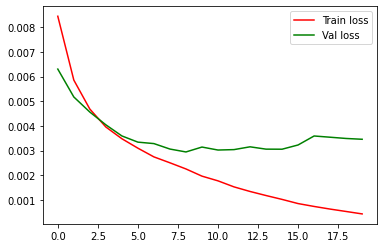

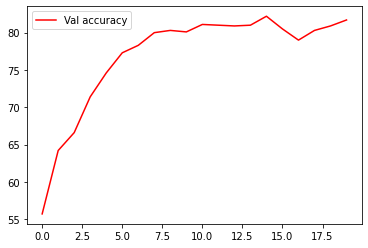

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()



plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Val loss')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Val accuracy')
plt.legend()
plt.show()

In [ ]:

#Compute accuracy on the test set
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

Accuracy of the network on the 1000 test images: 81.1 %


### Below is a visualization of filters **after** the training

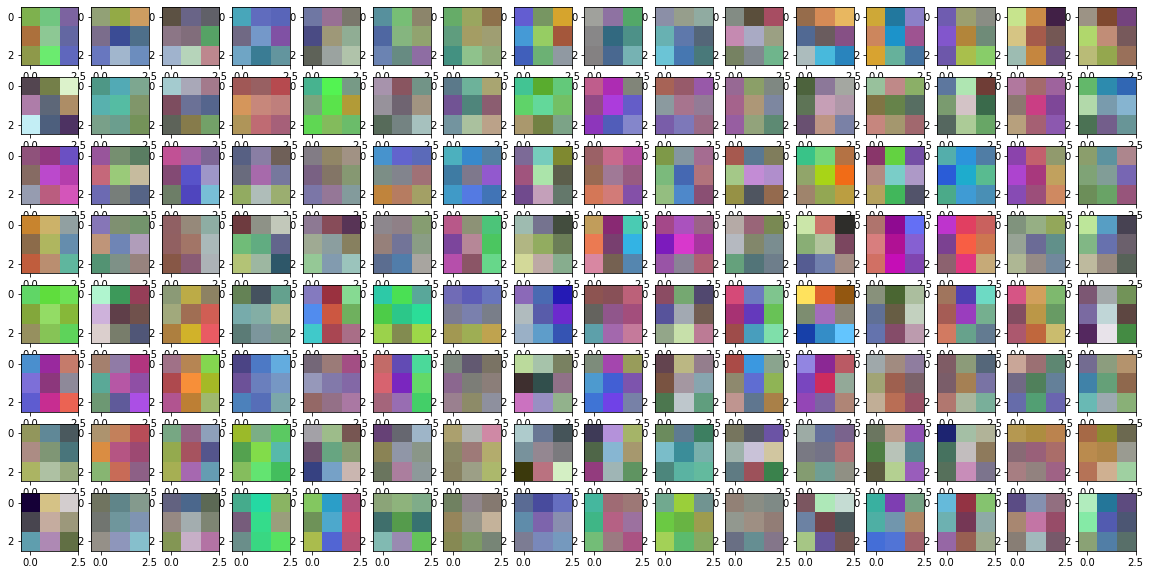

In [ ]:
#======================================================================================
# Q1.a: Implementing the function to visualize the filters in the first conv layers.
#======================================================================================
VisualizeFilter(model)

## 1.B. In this part, model size is calcuated.

In [ ]:
#-------------------------------------------------
# Calculate the model size (Q1.b)
# if disp is true, print the model parameters, otherwise, only return the number of parameters.
#-------------------------------------------------
def PrintModelSize(model, disp=True):
    #################################################################################
    # TODO: Implement the function to count the number of trainable parameters in   #
    # the input model. This useful to track the capacity of the model you are       #
    # training                                                                      #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    model_sz = sum(p.numel() for p in model.parameters() if p.requires_grad)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return model_sz

In [ ]:

#======================================================================================
# Q1.b: Implementing the function to count the number of trainable parameters in the model
#======================================================================================
PrintModelSize(model)

7678474

## 1.C. In this part, function for visualization of filters is built

In [ ]:

#-------------------------------------------------
# Calculate the model size (Q1.c)
# visualize the convolution filters of the first convolution layer of the input model
#-------------------------------------------------
def VisualizeFilter(model):
    #################################################################################
    # TODO: Implement the functiont to visualize the weights in the first conv layer#
    # in the model. Visualize them as a single image of stacked filters.            #
    # You can use matlplotlib.imshow to visualize an image in python                #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    w = model.cnn_layers[0].weight.cpu().data.numpy()
    filters = np.interp(w, (w.min(), w.max()), (0, 1))

    fig,axs=plt.subplots(8,16, figsize = (20, 10))
    
    axs=axs.ravel()
    for i in range(len(filters)):
        axs[i].imshow((filters[i]*255.0).astype(np.uint8))
    
    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [ ]:
from tqdm import tqdm

Visualization of filters after training 

## Question 2.A.

In [ ]:
# --------------------------------
# Device configuration
# --------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [ ]:
#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None #norm_layer = 'BN'
print(hidden_size)

[128, 512, 512, 512, 512]


### In this cell, the only modification I make is that I add batch normalization in each convolution layer. Further, I  compare the loss curves and accuracy

In [ ]:
# Q2.a - Initialize the model with correct batch norm layer

class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None):
        super(ConvNet, self).__init__()

       
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.cnn_layers = nn.Sequential(
            # Defining the first 2d convolitional layer
            nn.Conv2d(3,128 , kernel_size = 3, stride = 1, padding =1),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, stride = 2),                                
            nn.ReLU(),
            # Defining the second 2d convolitional layer                             
            nn.Conv2d(128, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the third 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the fourth 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the fifth 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(),

        )


        self.linear_layers = nn.Sequential(
            nn.Linear(512, 10)
        )


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        x = self.cnn_layers(x)
        
        x = x.view(x.size(0), -1)
      
        out = self.linear_layers(x)
      


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [ ]:
model = ConvNet(input_size, hidden_size, num_classes, norm_layer="BN").to(device)
# Q2.a - Initialize the model with correct batch norm layer

model.apply(weights_init)
# Print the model
print(model)

ConvNet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU()
    (8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
best_model = type(model)(input_size, hidden_size, num_classes, norm_layer=norm_layer) # get a new instance
#best_model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer)
for epoch in tqdm(range(num_epochs)):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    loss_train.append(loss_iter/(len(train_loader)*batch_size))

    
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
        
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
        
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        print('Validation accuracy is: {} %'.format(accuracy))

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Step [100/245], Loss: 1.3465
Epoch [1/20], Step [200/245], Loss: 1.0849


  5%|▌         | 1/20 [01:10<22:25, 70.81s/it]

Validation accuracy is: 48.5 %
Epoch [2/20], Step [100/245], Loss: 1.0178
Epoch [2/20], Step [200/245], Loss: 0.8747


 10%|█         | 2/20 [02:21<21:17, 70.97s/it]

Validation accuracy is: 65.5 %
Epoch [3/20], Step [100/245], Loss: 0.7415
Epoch [3/20], Step [200/245], Loss: 0.7289


 15%|█▌        | 3/20 [03:33<20:08, 71.07s/it]

Validation accuracy is: 67.8 %
Epoch [4/20], Step [100/245], Loss: 0.6530
Epoch [4/20], Step [200/245], Loss: 0.7845


 20%|██        | 4/20 [04:43<18:55, 70.94s/it]

Validation accuracy is: 66.8 %
Epoch [5/20], Step [100/245], Loss: 0.4706
Epoch [5/20], Step [200/245], Loss: 0.6914


 25%|██▌       | 5/20 [05:54<17:43, 70.90s/it]

Validation accuracy is: 73.0 %
Epoch [6/20], Step [100/245], Loss: 0.5300
Epoch [6/20], Step [200/245], Loss: 0.5655


 30%|███       | 6/20 [07:04<16:29, 70.71s/it]

Validation accuracy is: 78.1 %
Epoch [7/20], Step [100/245], Loss: 0.3907
Epoch [7/20], Step [200/245], Loss: 0.4254


 35%|███▌      | 7/20 [08:14<15:15, 70.40s/it]

Validation accuracy is: 76.7 %
Epoch [8/20], Step [100/245], Loss: 0.5299
Epoch [8/20], Step [200/245], Loss: 0.4357


 40%|████      | 8/20 [09:24<14:02, 70.21s/it]

Validation accuracy is: 74.1 %
Epoch [9/20], Step [100/245], Loss: 0.2343
Epoch [9/20], Step [200/245], Loss: 0.3988


 45%|████▌     | 9/20 [10:33<12:49, 69.96s/it]

Validation accuracy is: 81.4 %
Epoch [10/20], Step [100/245], Loss: 0.2257
Epoch [10/20], Step [200/245], Loss: 0.2564


 50%|█████     | 10/20 [11:43<11:37, 69.77s/it]

Validation accuracy is: 79.0 %
Epoch [11/20], Step [100/245], Loss: 0.2640
Epoch [11/20], Step [200/245], Loss: 0.2688


 55%|█████▌    | 11/20 [12:52<10:26, 69.57s/it]

Validation accuracy is: 77.1 %
Epoch [12/20], Step [100/245], Loss: 0.2427
Epoch [12/20], Step [200/245], Loss: 0.1813


 60%|██████    | 12/20 [14:01<09:16, 69.52s/it]

Validation accuracy is: 80.8 %
Epoch [13/20], Step [100/245], Loss: 0.0795
Epoch [13/20], Step [200/245], Loss: 0.2021


 65%|██████▌   | 13/20 [15:11<08:05, 69.43s/it]

Validation accuracy is: 80.6 %
Epoch [14/20], Step [100/245], Loss: 0.1029
Epoch [14/20], Step [200/245], Loss: 0.1782


 70%|███████   | 14/20 [16:19<06:55, 69.24s/it]

Validation accuracy is: 80.1 %
Epoch [15/20], Step [100/245], Loss: 0.1470
Epoch [15/20], Step [200/245], Loss: 0.1411


 75%|███████▌  | 15/20 [17:28<05:45, 69.12s/it]

Validation accuracy is: 81.4 %
Epoch [16/20], Step [100/245], Loss: 0.0780
Epoch [16/20], Step [200/245], Loss: 0.1449


 80%|████████  | 16/20 [18:37<04:35, 69.00s/it]

Validation accuracy is: 79.8 %
Epoch [17/20], Step [100/245], Loss: 0.1430
Epoch [17/20], Step [200/245], Loss: 0.1184


 85%|████████▌ | 17/20 [19:46<03:27, 69.01s/it]

Validation accuracy is: 80.0 %
Epoch [18/20], Step [100/245], Loss: 0.0541
Epoch [18/20], Step [200/245], Loss: 0.0828


 90%|█████████ | 18/20 [20:55<02:17, 68.93s/it]

Validation accuracy is: 81.3 %
Epoch [19/20], Step [100/245], Loss: 0.0396
Epoch [19/20], Step [200/245], Loss: 0.0921


 95%|█████████▌| 19/20 [22:03<01:08, 68.84s/it]

Validation accuracy is: 79.7 %
Epoch [20/20], Step [100/245], Loss: 0.0827
Epoch [20/20], Step [200/245], Loss: 0.1211


100%|██████████| 20/20 [23:12<00:00, 69.63s/it]

Validation accuracy is: 81.1 %


### Here I do the plot of losses and accuracies

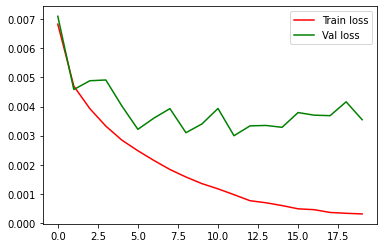

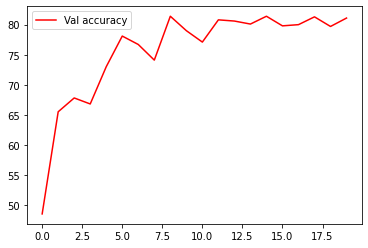

In [ ]:
model.eval()


plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Val loss')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Val accuracy')
plt.legend()
plt.show()

In [ ]:

#Compute accuracy on the test set
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))

Accuracy of the network on the 1000 test images: 80.6 %


## Question 2.B. (First Part)

### In this part of question, I add **early stopping** to try to save best model before it is overfit. Also, the number of epochs is increased to 50. The modification is going to be applied to the training phase.

### Firstly, we are going to apply early stopping to the model with batch normalization.  

In [ ]:
from tqdm import tqdm

In [ ]:
num_epochs = 50
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
best_model = type(model)(input_size, hidden_size, num_classes, norm_layer=norm_layer) # get a new instance
#best_model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer)
for epoch in tqdm(range(num_epochs)):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    loss_train.append(loss_iter/(len(train_loader)*batch_size))

    
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
        
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
        
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        print('Validation accuracy is: {} %'.format(accuracy))
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # the model with the best validation accuracy so-far (use best_model).          #
        #################################################################################

        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if epoch == 0 or accuracy >= np.max(accuracy_val):
            best_model = model
            torch.save(best_model.state_dict(), 'model.ckpt')
            if epoch > 0:
                print(
                    f"\tHigher validation accuracy at epoch {epoch+1} with acuracy {accuracy}%")
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch [1/50], Step [100/245], Loss: 1.3174
Epoch [1/50], Step [200/245], Loss: 1.1657


  2%|▏         | 1/50 [01:09<56:38, 69.35s/it]

Validation accuracy is: 59.6 %
Epoch [2/50], Step [100/245], Loss: 1.1101
Epoch [2/50], Step [200/245], Loss: 0.9167


  4%|▍         | 2/50 [02:18<55:30, 69.38s/it]

Validation accuracy is: 56.3 %
Epoch [3/50], Step [100/245], Loss: 0.7591
Epoch [3/50], Step [200/245], Loss: 0.6940


  6%|▌         | 3/50 [03:28<54:21, 69.39s/it]

Validation accuracy is: 53.6 %
Epoch [4/50], Step [100/245], Loss: 0.6491
Epoch [4/50], Step [200/245], Loss: 0.6164


  8%|▊         | 4/50 [04:37<53:12, 69.41s/it]

Validation accuracy is: 75.4 %
	Higher validation accuracy at epoch 4 with acuracy 75.4%
Epoch [5/50], Step [100/245], Loss: 0.6956
Epoch [5/50], Step [200/245], Loss: 0.5978


 10%|█         | 5/50 [05:46<52:00, 69.34s/it]

Validation accuracy is: 63.5 %
Epoch [6/50], Step [100/245], Loss: 0.6269
Epoch [6/50], Step [200/245], Loss: 0.4619


 12%|█▏        | 6/50 [06:55<50:48, 69.27s/it]

Validation accuracy is: 75.6 %
	Higher validation accuracy at epoch 6 with acuracy 75.6%
Epoch [7/50], Step [100/245], Loss: 0.3858
Epoch [7/50], Step [200/245], Loss: 0.5034


 14%|█▍        | 7/50 [08:05<49:38, 69.27s/it]

Validation accuracy is: 78.2 %
	Higher validation accuracy at epoch 7 with acuracy 78.2%
Epoch [8/50], Step [100/245], Loss: 0.3762
Epoch [8/50], Step [200/245], Loss: 0.4044


 16%|█▌        | 8/50 [09:13<48:21, 69.09s/it]

Validation accuracy is: 79.0 %
	Higher validation accuracy at epoch 8 with acuracy 79.0%
Epoch [9/50], Step [100/245], Loss: 0.3459
Epoch [9/50], Step [200/245], Loss: 0.3217


 18%|█▊        | 9/50 [10:22<47:04, 68.89s/it]

Validation accuracy is: 79.3 %
	Higher validation accuracy at epoch 9 with acuracy 79.3%
Epoch [10/50], Step [100/245], Loss: 0.2661
Epoch [10/50], Step [200/245], Loss: 0.3547


 20%|██        | 10/50 [11:30<45:49, 68.74s/it]

Validation accuracy is: 81.5 %
	Higher validation accuracy at epoch 10 with acuracy 81.5%
Epoch [11/50], Step [100/245], Loss: 0.2780
Epoch [11/50], Step [200/245], Loss: 0.2349


 22%|██▏       | 11/50 [12:38<44:34, 68.57s/it]

Validation accuracy is: 79.6 %
Epoch [12/50], Step [100/245], Loss: 0.1598
Epoch [12/50], Step [200/245], Loss: 0.1917


 24%|██▍       | 12/50 [13:46<43:18, 68.38s/it]

Validation accuracy is: 82.0 %
	Higher validation accuracy at epoch 12 with acuracy 82.0%
Epoch [13/50], Step [100/245], Loss: 0.1242
Epoch [13/50], Step [200/245], Loss: 0.1853


 26%|██▌       | 13/50 [14:55<42:08, 68.34s/it]

Validation accuracy is: 82.7 %
	Higher validation accuracy at epoch 13 with acuracy 82.7%
Epoch [14/50], Step [100/245], Loss: 0.0877
Epoch [14/50], Step [200/245], Loss: 0.1263


 28%|██▊       | 14/50 [16:03<40:56, 68.24s/it]

Validation accuracy is: 80.4 %
Epoch [15/50], Step [100/245], Loss: 0.1491
Epoch [15/50], Step [200/245], Loss: 0.0989


 30%|███       | 15/50 [17:11<39:44, 68.13s/it]

Validation accuracy is: 81.2 %
Epoch [16/50], Step [100/245], Loss: 0.0839
Epoch [16/50], Step [200/245], Loss: 0.0937


 32%|███▏      | 16/50 [18:18<38:33, 68.06s/it]

Validation accuracy is: 81.7 %
Epoch [17/50], Step [100/245], Loss: 0.0600
Epoch [17/50], Step [200/245], Loss: 0.1103


 34%|███▍      | 17/50 [19:26<37:23, 67.98s/it]

Validation accuracy is: 81.5 %
Epoch [18/50], Step [100/245], Loss: 0.0586
Epoch [18/50], Step [200/245], Loss: 0.0657


 36%|███▌      | 18/50 [20:34<36:17, 68.04s/it]

Validation accuracy is: 80.8 %
Epoch [19/50], Step [100/245], Loss: 0.0620
Epoch [19/50], Step [200/245], Loss: 0.1020


 38%|███▊      | 19/50 [21:43<35:13, 68.16s/it]

Validation accuracy is: 80.7 %
Epoch [20/50], Step [100/245], Loss: 0.0394
Epoch [20/50], Step [200/245], Loss: 0.0671


 40%|████      | 20/50 [22:51<34:05, 68.19s/it]

Validation accuracy is: 81.8 %
Epoch [21/50], Step [100/245], Loss: 0.0648
Epoch [21/50], Step [200/245], Loss: 0.0489


 42%|████▏     | 21/50 [23:59<32:56, 68.17s/it]

Validation accuracy is: 79.6 %
Epoch [22/50], Step [100/245], Loss: 0.0534
Epoch [22/50], Step [200/245], Loss: 0.0469


 44%|████▍     | 22/50 [25:07<31:46, 68.11s/it]

Validation accuracy is: 82.2 %
Epoch [23/50], Step [100/245], Loss: 0.0370
Epoch [23/50], Step [200/245], Loss: 0.0362


 46%|████▌     | 23/50 [26:15<30:37, 68.07s/it]

Validation accuracy is: 81.9 %
Epoch [24/50], Step [100/245], Loss: 0.0210
Epoch [24/50], Step [200/245], Loss: 0.0300


 48%|████▊     | 24/50 [27:23<29:28, 68.04s/it]

Validation accuracy is: 82.4 %
Epoch [25/50], Step [100/245], Loss: 0.0123
Epoch [25/50], Step [200/245], Loss: 0.0668


 50%|█████     | 25/50 [28:31<28:20, 68.00s/it]

Validation accuracy is: 81.6 %
Epoch [26/50], Step [100/245], Loss: 0.0210
Epoch [26/50], Step [200/245], Loss: 0.0185


 52%|█████▏    | 26/50 [29:39<27:12, 68.02s/it]

Validation accuracy is: 80.4 %
Epoch [27/50], Step [100/245], Loss: 0.0404
Epoch [27/50], Step [200/245], Loss: 0.0425


 54%|█████▍    | 27/50 [30:47<26:04, 68.01s/it]

Validation accuracy is: 82.4 %
Epoch [28/50], Step [100/245], Loss: 0.0216
Epoch [28/50], Step [200/245], Loss: 0.0150


 56%|█████▌    | 28/50 [31:55<24:56, 68.00s/it]

Validation accuracy is: 82.9 %
	Higher validation accuracy at epoch 28 with acuracy 82.9%
Epoch [29/50], Step [100/245], Loss: 0.0125
Epoch [29/50], Step [200/245], Loss: 0.0134


 58%|█████▊    | 29/50 [33:03<23:47, 67.99s/it]

Validation accuracy is: 82.7 %
Epoch [30/50], Step [100/245], Loss: 0.0209
Epoch [30/50], Step [200/245], Loss: 0.0178


 60%|██████    | 30/50 [34:11<22:39, 67.99s/it]

Validation accuracy is: 83.4 %
	Higher validation accuracy at epoch 30 with acuracy 83.4%
Epoch [31/50], Step [100/245], Loss: 0.0218
Epoch [31/50], Step [200/245], Loss: 0.0311


 62%|██████▏   | 31/50 [35:19<21:30, 67.93s/it]

Validation accuracy is: 79.4 %
Epoch [32/50], Step [100/245], Loss: 0.0213
Epoch [32/50], Step [200/245], Loss: 0.0620


 64%|██████▍   | 32/50 [36:27<20:22, 67.89s/it]

Validation accuracy is: 80.9 %
Epoch [33/50], Step [100/245], Loss: 0.0339
Epoch [33/50], Step [200/245], Loss: 0.0309


 66%|██████▌   | 33/50 [37:35<19:14, 67.93s/it]

Validation accuracy is: 83.1 %
Epoch [34/50], Step [100/245], Loss: 0.0184
Epoch [34/50], Step [200/245], Loss: 0.0354


 68%|██████▊   | 34/50 [38:43<18:07, 67.94s/it]

Validation accuracy is: 82.9 %
Epoch [35/50], Step [100/245], Loss: 0.0104
Epoch [35/50], Step [200/245], Loss: 0.0139


 70%|███████   | 35/50 [39:50<16:58, 67.91s/it]

Validation accuracy is: 82.9 %
Epoch [36/50], Step [100/245], Loss: 0.0029
Epoch [36/50], Step [200/245], Loss: 0.0064


 72%|███████▏  | 36/50 [40:58<15:50, 67.91s/it]

Validation accuracy is: 84.6 %
	Higher validation accuracy at epoch 36 with acuracy 84.6%
Epoch [37/50], Step [100/245], Loss: 0.0029
Epoch [37/50], Step [200/245], Loss: 0.0024


 74%|███████▍  | 37/50 [42:06<14:42, 67.89s/it]

Validation accuracy is: 84.2 %
Epoch [38/50], Step [100/245], Loss: 0.0018
Epoch [38/50], Step [200/245], Loss: 0.0032


 76%|███████▌  | 38/50 [43:14<13:34, 67.83s/it]

Validation accuracy is: 84.1 %
Epoch [39/50], Step [100/245], Loss: 0.0026
Epoch [39/50], Step [200/245], Loss: 0.0033


 78%|███████▊  | 39/50 [44:22<12:26, 67.83s/it]

Validation accuracy is: 84.9 %
	Higher validation accuracy at epoch 39 with acuracy 84.9%
Epoch [40/50], Step [100/245], Loss: 0.0028
Epoch [40/50], Step [200/245], Loss: 0.0065


 80%|████████  | 40/50 [45:30<11:18, 67.86s/it]

Validation accuracy is: 84.0 %
Epoch [41/50], Step [100/245], Loss: 0.0026
Epoch [41/50], Step [200/245], Loss: 0.0021


 82%|████████▏ | 41/50 [46:38<10:10, 67.86s/it]

Validation accuracy is: 83.9 %
Epoch [42/50], Step [100/245], Loss: 0.0039
Epoch [42/50], Step [200/245], Loss: 0.0029


 84%|████████▍ | 42/50 [47:45<09:02, 67.87s/it]

Validation accuracy is: 84.8 %
Epoch [43/50], Step [100/245], Loss: 0.0041
Epoch [43/50], Step [200/245], Loss: 0.0034


 86%|████████▌ | 43/50 [48:53<07:55, 67.88s/it]

Validation accuracy is: 84.6 %
Epoch [44/50], Step [100/245], Loss: 0.1101
Epoch [44/50], Step [200/245], Loss: 0.1002


 88%|████████▊ | 44/50 [50:01<06:47, 67.88s/it]

Validation accuracy is: 81.6 %
Epoch [45/50], Step [100/245], Loss: 0.0173
Epoch [45/50], Step [200/245], Loss: 0.0192


 90%|█████████ | 45/50 [51:09<05:39, 67.86s/it]

Validation accuracy is: 84.2 %
Epoch [46/50], Step [100/245], Loss: 0.0060
Epoch [46/50], Step [200/245], Loss: 0.0076


 92%|█████████▏| 46/50 [52:17<04:31, 67.82s/it]

Validation accuracy is: 83.2 %
Epoch [47/50], Step [100/245], Loss: 0.0041
Epoch [47/50], Step [200/245], Loss: 0.0036


 94%|█████████▍| 47/50 [53:25<03:23, 67.84s/it]

Validation accuracy is: 83.8 %
Epoch [48/50], Step [100/245], Loss: 0.0025
Epoch [48/50], Step [200/245], Loss: 0.0026


 96%|█████████▌| 48/50 [54:32<02:15, 67.84s/it]

Validation accuracy is: 84.1 %
Epoch [49/50], Step [100/245], Loss: 0.0026
Epoch [49/50], Step [200/245], Loss: 0.0023


 98%|█████████▊| 49/50 [55:40<01:07, 67.89s/it]

Validation accuracy is: 85.0 %
	Higher validation accuracy at epoch 49 with acuracy 85.0%
Epoch [50/50], Step [100/245], Loss: 0.0021
Epoch [50/50], Step [200/245], Loss: 0.0022


100%|██████████| 50/50 [56:48<00:00, 68.18s/it]

Validation accuracy is: 84.1 %


## Question 2.B. (Second Part)

In [9]:
from tqdm import tqdm

In [ ]:
# --------------------------------
# Device configuration
# --------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [6]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.cnn_layers = nn.Sequential(
            # Defining the first 2d convolitional layer
            nn.Conv2d(3,128 , kernel_size = 3, stride = 1, padding =1), 
            nn.MaxPool2d(2, stride = 2),                                
            nn.ReLU(),
            # Defining the second 2d convolitional layer                             
            nn.Conv2d(128, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the third 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the fourth 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(), 
            # Defining the fifth 2d convolitional layer 
            nn.Conv2d(512, 512 , kernel_size = 3, stride = 1, padding =1),
            nn.MaxPool2d(2, stride = 2), 
            nn.ReLU(),

        )


        self.linear_layers = nn.Sequential(
            nn.Linear(512, 10)
        )


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # conv layers
        x = self.cnn_layers(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fully connected layer
        out = self.linear_layers(x)
      


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [7]:
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)

In [ ]:
num_epochs = 50
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
best_model = type(model)(input_size, hidden_size, num_classes, norm_layer=norm_layer) # get a new instance
#best_model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer)
for epoch in tqdm(range(num_epochs)):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    loss_train.append(loss_iter/(len(train_loader)*batch_size))

    
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
        
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
        
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        print('Validation accuracy is: {} %'.format(accuracy))
        
        if epoch == 0 or accuracy >= np.max(accuracy_val):
            best_model = model
            torch.save(best_model.state_dict(), 'model.ckpt')
            if epoch > 0:
                print(
                    f"\tHigher validation accuracy at epoch {epoch+1} with acuracy {accuracy}%")
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch [1/50], Step [100/245], Loss: 1.8092
Epoch [1/50], Step [200/245], Loss: 1.4189


  2%|▏         | 1/50 [01:07<55:23, 67.83s/it]

Validation accuracy is: 53.1 %
Epoch [2/50], Step [100/245], Loss: 1.1732
Epoch [2/50], Step [200/245], Loss: 1.1763


  4%|▍         | 2/50 [02:15<54:03, 67.57s/it]

Validation accuracy is: 61.5 %
	Higher validation accuracy at epoch 2 with acuracy 61.5%
Epoch [3/50], Step [100/245], Loss: 0.8876
Epoch [3/50], Step [200/245], Loss: 1.0458


  6%|▌         | 3/50 [03:22<52:48, 67.42s/it]

Validation accuracy is: 64.7 %
	Higher validation accuracy at epoch 3 with acuracy 64.7%
Epoch [4/50], Step [100/245], Loss: 0.9057
Epoch [4/50], Step [200/245], Loss: 0.8434


  8%|▊         | 4/50 [04:29<51:42, 67.44s/it]

Validation accuracy is: 71.1 %
	Higher validation accuracy at epoch 4 with acuracy 71.1%
Epoch [5/50], Step [100/245], Loss: 0.7539
Epoch [5/50], Step [200/245], Loss: 0.7382


 10%|█         | 5/50 [05:37<50:34, 67.42s/it]

Validation accuracy is: 70.2 %
Epoch [6/50], Step [100/245], Loss: 0.6624
Epoch [6/50], Step [200/245], Loss: 0.5707


 12%|█▏        | 6/50 [06:44<49:26, 67.42s/it]

Validation accuracy is: 73.4 %
	Higher validation accuracy at epoch 6 with acuracy 73.4%
Epoch [7/50], Step [100/245], Loss: 0.5610
Epoch [7/50], Step [200/245], Loss: 0.5337


 14%|█▍        | 7/50 [07:52<48:19, 67.43s/it]

Validation accuracy is: 74.8 %
	Higher validation accuracy at epoch 7 with acuracy 74.8%
Epoch [8/50], Step [100/245], Loss: 0.4469
Epoch [8/50], Step [200/245], Loss: 0.5404


 16%|█▌        | 8/50 [08:59<47:12, 67.43s/it]

Validation accuracy is: 75.7 %
	Higher validation accuracy at epoch 8 with acuracy 75.7%
Epoch [9/50], Step [100/245], Loss: 0.5278
Epoch [9/50], Step [200/245], Loss: 0.5038


 18%|█▊        | 9/50 [10:06<46:02, 67.37s/it]

Validation accuracy is: 76.6 %
	Higher validation accuracy at epoch 9 with acuracy 76.6%
Epoch [10/50], Step [100/245], Loss: 0.4186
Epoch [10/50], Step [200/245], Loss: 0.5739


 20%|██        | 10/50 [11:14<44:53, 67.34s/it]

Validation accuracy is: 78.0 %
	Higher validation accuracy at epoch 10 with acuracy 78.0%
Epoch [11/50], Step [100/245], Loss: 0.5788
Epoch [11/50], Step [200/245], Loss: 0.4933


 22%|██▏       | 11/50 [12:21<43:46, 67.36s/it]

Validation accuracy is: 78.1 %
	Higher validation accuracy at epoch 11 with acuracy 78.1%
Epoch [12/50], Step [100/245], Loss: 0.3436
Epoch [12/50], Step [200/245], Loss: 0.4263


 24%|██▍       | 12/50 [13:28<42:38, 67.33s/it]

Validation accuracy is: 78.7 %
	Higher validation accuracy at epoch 12 with acuracy 78.7%
Epoch [13/50], Step [100/245], Loss: 0.3443
Epoch [13/50], Step [200/245], Loss: 0.3771


 26%|██▌       | 13/50 [14:36<41:30, 67.30s/it]

Validation accuracy is: 79.4 %
	Higher validation accuracy at epoch 13 with acuracy 79.4%
Epoch [14/50], Step [100/245], Loss: 0.4171
Epoch [14/50], Step [200/245], Loss: 0.3010


 28%|██▊       | 14/50 [15:43<40:21, 67.26s/it]

Validation accuracy is: 78.4 %
Epoch [15/50], Step [100/245], Loss: 0.2540
Epoch [15/50], Step [200/245], Loss: 0.3049


 30%|███       | 15/50 [16:50<39:12, 67.21s/it]

Validation accuracy is: 79.1 %
Epoch [16/50], Step [100/245], Loss: 0.2801
Epoch [16/50], Step [200/245], Loss: 0.3591


 32%|███▏      | 16/50 [17:57<38:04, 67.19s/it]

Validation accuracy is: 79.8 %
	Higher validation accuracy at epoch 16 with acuracy 79.8%
Epoch [17/50], Step [100/245], Loss: 0.2159
Epoch [17/50], Step [200/245], Loss: 0.2876


 34%|███▍      | 17/50 [19:04<36:55, 67.15s/it]

Validation accuracy is: 78.1 %
Epoch [18/50], Step [100/245], Loss: 0.1988
Epoch [18/50], Step [200/245], Loss: 0.1727


 36%|███▌      | 18/50 [20:11<35:47, 67.11s/it]

Validation accuracy is: 80.3 %
	Higher validation accuracy at epoch 18 with acuracy 80.3%
Epoch [19/50], Step [100/245], Loss: 0.2517
Epoch [19/50], Step [200/245], Loss: 0.1606


 38%|███▊      | 19/50 [21:18<34:38, 67.06s/it]

Validation accuracy is: 78.8 %
Epoch [20/50], Step [100/245], Loss: 0.1357
Epoch [20/50], Step [200/245], Loss: 0.1555


 40%|████      | 20/50 [22:25<33:29, 66.98s/it]

Validation accuracy is: 78.0 %
Epoch [21/50], Step [100/245], Loss: 0.1781
Epoch [21/50], Step [200/245], Loss: 0.1685


 42%|████▏     | 21/50 [23:31<32:20, 66.90s/it]

Validation accuracy is: 79.4 %
Epoch [22/50], Step [100/245], Loss: 0.1203
Epoch [22/50], Step [200/245], Loss: 0.1561


 44%|████▍     | 22/50 [24:38<31:11, 66.85s/it]

Validation accuracy is: 79.6 %
Epoch [23/50], Step [100/245], Loss: 0.1104
Epoch [23/50], Step [200/245], Loss: 0.1575


 46%|████▌     | 23/50 [25:45<30:03, 66.79s/it]

Validation accuracy is: 78.9 %
Epoch [24/50], Step [100/245], Loss: 0.1122
Epoch [24/50], Step [200/245], Loss: 0.0997


 48%|████▊     | 24/50 [26:52<28:56, 66.78s/it]

Validation accuracy is: 79.2 %
Epoch [25/50], Step [100/245], Loss: 0.1035
Epoch [25/50], Step [200/245], Loss: 0.1367


 50%|█████     | 25/50 [27:58<27:47, 66.72s/it]

Validation accuracy is: 77.5 %
Epoch [26/50], Step [100/245], Loss: 0.0606
Epoch [26/50], Step [200/245], Loss: 0.0591


 52%|█████▏    | 26/50 [29:05<26:39, 66.65s/it]

Validation accuracy is: 77.9 %
Epoch [27/50], Step [100/245], Loss: 0.0358
Epoch [27/50], Step [200/245], Loss: 0.0657


 54%|█████▍    | 27/50 [30:11<25:31, 66.57s/it]

Validation accuracy is: 79.1 %
Epoch [28/50], Step [100/245], Loss: 0.0667
Epoch [28/50], Step [200/245], Loss: 0.0551


 56%|█████▌    | 28/50 [31:18<24:24, 66.57s/it]

Validation accuracy is: 79.5 %
Epoch [29/50], Step [100/245], Loss: 0.0320
Epoch [29/50], Step [200/245], Loss: 0.0753


 58%|█████▊    | 29/50 [32:24<23:17, 66.55s/it]

Validation accuracy is: 79.4 %
Epoch [30/50], Step [100/245], Loss: 0.0414
Epoch [30/50], Step [200/245], Loss: 0.0379


 60%|██████    | 30/50 [33:31<22:10, 66.54s/it]

Validation accuracy is: 78.9 %
Epoch [31/50], Step [100/245], Loss: 0.0323
Epoch [31/50], Step [200/245], Loss: 0.0530


 62%|██████▏   | 31/50 [34:37<21:05, 66.58s/it]

Validation accuracy is: 79.4 %
Epoch [32/50], Step [100/245], Loss: 0.0401
Epoch [32/50], Step [200/245], Loss: 0.0304


 64%|██████▍   | 32/50 [35:44<19:59, 66.62s/it]

Validation accuracy is: 78.2 %
Epoch [33/50], Step [100/245], Loss: 0.0222
Epoch [33/50], Step [200/245], Loss: 0.0286


 66%|██████▌   | 33/50 [36:51<18:53, 66.65s/it]

Validation accuracy is: 78.3 %
Epoch [34/50], Step [100/245], Loss: 0.0241
Epoch [34/50], Step [200/245], Loss: 0.0606


 68%|██████▊   | 34/50 [37:58<17:46, 66.69s/it]

Validation accuracy is: 78.6 %
Epoch [35/50], Step [100/245], Loss: 0.0462
Epoch [35/50], Step [200/245], Loss: 0.0423


 70%|███████   | 35/50 [39:04<16:40, 66.70s/it]

Validation accuracy is: 79.2 %
Epoch [36/50], Step [100/245], Loss: 0.0190
Epoch [36/50], Step [200/245], Loss: 0.0327


 72%|███████▏  | 36/50 [40:11<15:34, 66.72s/it]

Validation accuracy is: 80.0 %
Epoch [37/50], Step [100/245], Loss: 0.0260
Epoch [37/50], Step [200/245], Loss: 0.0327


 74%|███████▍  | 37/50 [41:18<14:27, 66.73s/it]

Validation accuracy is: 79.3 %
Epoch [38/50], Step [100/245], Loss: 0.0288
Epoch [38/50], Step [200/245], Loss: 0.0239


 76%|███████▌  | 38/50 [42:25<13:21, 66.76s/it]

Validation accuracy is: 78.5 %
Epoch [39/50], Step [100/245], Loss: 0.0189
Epoch [39/50], Step [200/245], Loss: 0.0270


 78%|███████▊  | 39/50 [43:31<12:14, 66.76s/it]

Validation accuracy is: 80.0 %
Epoch [40/50], Step [100/245], Loss: 0.0210
Epoch [40/50], Step [200/245], Loss: 0.0260


 80%|████████  | 40/50 [44:38<11:07, 66.78s/it]

Validation accuracy is: 78.8 %
Epoch [41/50], Step [100/245], Loss: 0.0179
Epoch [41/50], Step [200/245], Loss: 0.0280


 82%|████████▏ | 41/50 [45:45<10:01, 66.79s/it]

Validation accuracy is: 78.1 %
Epoch [42/50], Step [100/245], Loss: 0.0203
Epoch [42/50], Step [200/245], Loss: 0.0225


 84%|████████▍ | 42/50 [46:52<08:54, 66.81s/it]

Validation accuracy is: 77.8 %
Epoch [43/50], Step [100/245], Loss: 0.0176
Epoch [43/50], Step [200/245], Loss: 0.0232


 86%|████████▌ | 43/50 [47:58<07:47, 66.76s/it]

Validation accuracy is: 78.7 %
Epoch [44/50], Step [100/245], Loss: 0.0191
Epoch [44/50], Step [200/245], Loss: 0.0282


 88%|████████▊ | 44/50 [49:05<06:40, 66.67s/it]

Validation accuracy is: 79.5 %
Epoch [45/50], Step [100/245], Loss: 0.0223
Epoch [45/50], Step [200/245], Loss: 0.0157


 90%|█████████ | 45/50 [50:12<05:33, 66.71s/it]

Validation accuracy is: 78.6 %
Epoch [46/50], Step [100/245], Loss: 0.0202
Epoch [46/50], Step [200/245], Loss: 0.0208


 92%|█████████▏| 46/50 [51:19<04:26, 66.75s/it]

Validation accuracy is: 78.5 %
Epoch [47/50], Step [100/245], Loss: 0.0199
Epoch [47/50], Step [200/245], Loss: 0.0221


 94%|█████████▍| 47/50 [52:25<03:20, 66.75s/it]

Validation accuracy is: 78.7 %
Epoch [48/50], Step [100/245], Loss: 0.0220
Epoch [48/50], Step [200/245], Loss: 0.0356


 96%|█████████▌| 48/50 [53:32<02:13, 66.78s/it]

Validation accuracy is: 78.6 %
Epoch [49/50], Step [100/245], Loss: 0.0160
Epoch [49/50], Step [200/245], Loss: 0.0139


 98%|█████████▊| 49/50 [54:39<01:06, 66.82s/it]

Validation accuracy is: 78.7 %
Epoch [50/50], Step [100/245], Loss: 0.0165
